<a href="https://colab.research.google.com/github/AmmarMalik93/MachineLearningSabKayLiey/blob/master/FaceMaskDetection/MaskDetection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [0]:
PATH = 'gdrive/My Drive/Colab Notebooks/ML_YouTube_Course/MaskDataset/'
filename = PATH+'dataset.npz'
npzfile = np.load(filename)
mask = npzfile['mask']
no_mask = npzfile['no_mask']

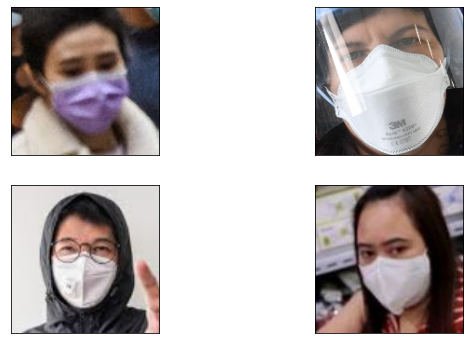

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6), subplot_kw={'xticks': [], 'yticks': []})
i = 0
for ax in axs.flat:
  ax.imshow(mask[i])
  i += 1

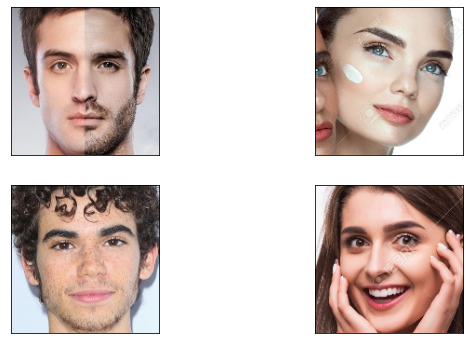

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6), subplot_kw={'xticks': [], 'yticks': []})
i = 0
for ax in axs.flat:
  ax.imshow(no_mask[i])
  i += 1

In [0]:
y_mask = np.ones((len(mask)))
y_no_mask = np.zeros((len(no_mask)))

In [7]:
X = np.concatenate((mask,no_mask))
y = np.concatenate((y_mask,y_no_mask))
print(X.shape)
print(y.shape)

(2767, 160, 160, 3)
(2767,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
input_shape = (X_train.shape[1],X_train.shape[2],3)
model = keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 156, 156, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 154, 154, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 77, 77, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 77, 77, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 379456)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               48570496  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [10]:
history = model.fit(X_train, y_train, epochs = 10, verbose = 1, batch_size = 32, validation_data=(X_test, y_test))

Epoch 1/10
70/70 [==============================] - 3s 47ms/step - loss: 0.9815 - accuracy: 0.8238 - val_loss: 0.1563 - val_accuracy: 0.9585
Epoch 2/10
70/70 [==============================] - 3s 42ms/step - loss: 0.1670 - accuracy: 0.9440 - val_loss: 0.1623 - val_accuracy: 0.9458
Epoch 3/10
70/70 [==============================] - 3s 42ms/step - loss: 0.1289 - accuracy: 0.9489 - val_loss: 0.1385 - val_accuracy: 0.9585
Epoch 4/10
70/70 [==============================] - 3s 42ms/step - loss: 0.0775 - accuracy: 0.9724 - val_loss: 0.1217 - val_accuracy: 0.9603
Epoch 5/10
70/70 [==============================] - 3s 42ms/step - loss: 0.0574 - accuracy: 0.9779 - val_loss: 0.0942 - val_accuracy: 0.9729
Epoch 6/10
70/70 [==============================] - 3s 42ms/step - loss: 0.0362 - accuracy: 0.9873 - val_loss: 0.1016 - val_accuracy: 0.9693
Epoch 7/10
70/70 [==============================] - 3s 42ms/step - loss: 0.0260 - accuracy: 0.9914 - val_loss: 0.1026 - val_accuracy: 0.9801
Epoch 8/10
70

Text(0.5, 0.98, 'Model Performance')

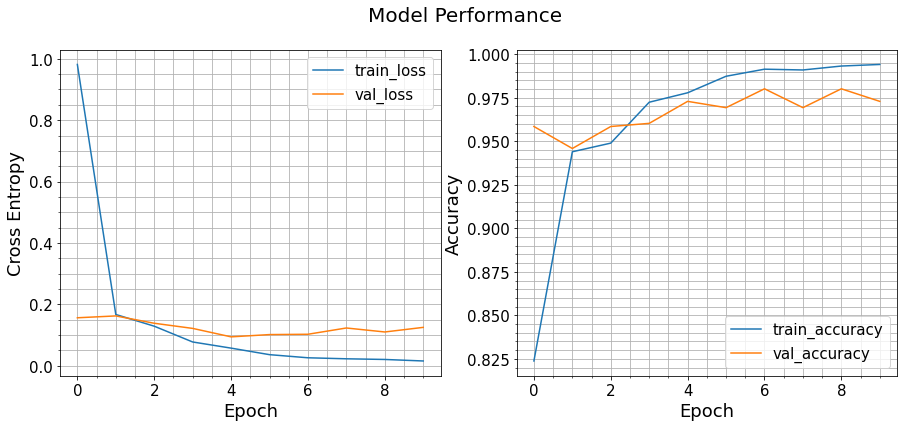

In [11]:
# plot learning curves
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 6))
#ax1.set_title('Learning Curves')
ax1.set_xlabel('Epoch', fontsize=18)
ax1.set_ylabel('Cross Entropy', fontsize=18)
ax1.grid(which='both')
ax1.minorticks_on()
ax1.plot(history.history['loss'], label='train_loss')
ax1.plot(history.history['val_loss'], label='val_loss')
ax1.tick_params(labelsize=15)
ax1.legend(loc='best',fontsize=15)

ax2.set_xlabel('Epoch', fontsize=18)
ax2.set_ylabel('Accuracy', fontsize=18)
ax2.grid(which='both')
ax2.minorticks_on()
ax2.plot(history.history['accuracy'], label='train_accuracy')
ax2.plot(history.history['val_accuracy'], label='val_accuracy')
ax2.tick_params(labelsize=15)
ax2.legend(loc='best',fontsize=15)
fig.suptitle('Model Performance', fontsize=20)

In [0]:
model_name = 'face_mask.h5'
model.save(model_name)